# Perceptron Learning Algorithm with Scikit-Learn
The scikit-learn application of Perceptron algorithm will be discussed here. Also we will see the result in case of multiclass classification. To keep in mind perceptron never reach to convergence if the class are not linearly seperable.

### Regular Import

In [4]:
from sklearn import datasets
import numpy as np

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# import sys

In [3]:
# Plot setting
plt.style.use('bmh')
plt.rcParams["font.size"] = "20"

### Data Load & Exploration

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Coass labels: ', np.unique(y))

Coass labels:  [0 1 2]


### Preprocession

In [6]:
print("Feature Matrix : \n", X[:3])
print("Target Column Vector : \n", y[:3])

Feature Matrix : 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
Target Column Vector : 
 [0 0 0]


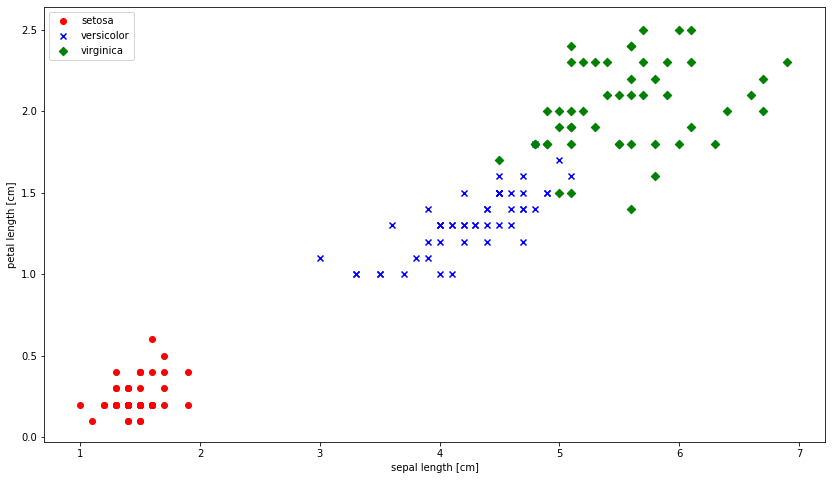

In [9]:
plt.figure(figsize=(14,8))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.scatter(X[100:, 0], X[100:, 1], color='green', marker='D', label = 'virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [1]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Training A Model

In [10]:
from sklearn.linear_model import  Perceptron

In [11]:
ppn = Perceptron(eta0=0.1, random_state=0, max_iter=100)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

### Evaluating The Model

#### Validation With Accuracy over Test and Matrics

In [12]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: {}'.format((y_test != y_pred).sum()))

Misclassified samples: 3


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print('Accuracy: {0:.2%}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 93.33%


In [15]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


#### Checking The Disission Boundry

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from neuralbase import plot_decision_regions_combined

In [17]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

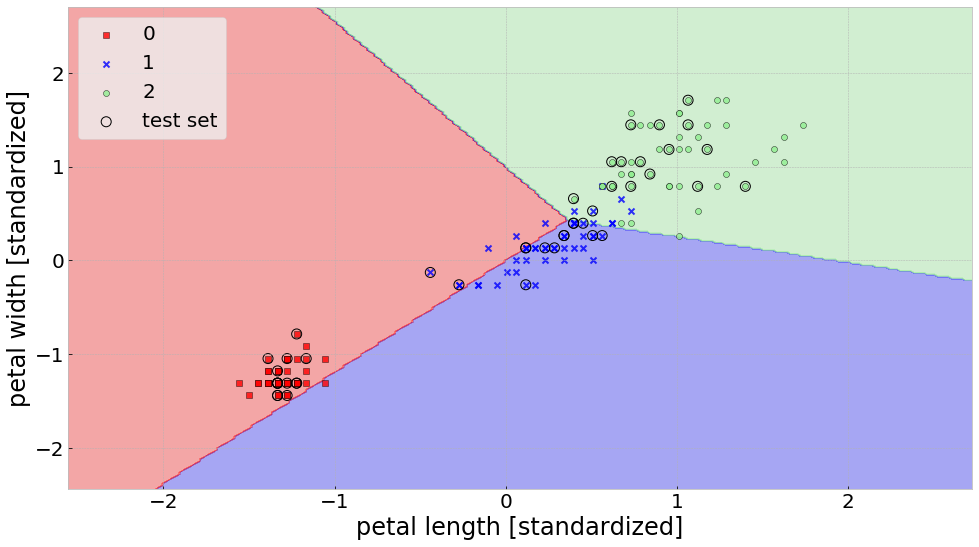

In [18]:
plt.figure(figsize=(14, 8))
plot_decision_regions_combined(
    features=X_combined_std, targets=y_combined, 
    classifier=ppn, test_idx=range(105, 150)
)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

*Note: Result Shows the Perceptron Algorithm from Scikit-Learn was abole to seperate most of the samples but also the flowers are not perfectly seperable, which also to be noted that that algorithm never converges if the class are not seperable so other algorithm worth trying when the classes are not linearly sepearble*

### Referances

[1] [Python Machine Learning](https://sebastianraschka.com/books.html)